<a href="https://colab.research.google.com/github/anandaviana/Analise-adote-petz/blob/main/01_Petz_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importações

In [ ]:
# Importações

import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Tratamento de dados

In [ ]:
#Ler os dados brutos em formato json - quando há um dicionário único

#ata = pd.read_json('/content/drive/MyDrive/Petz/Json/PetzDados_2024_10_05.json')

In [ ]:
file_1 = '/content/drive/MyDrive/Petz/Json/dados_2024-12-21_1.json'
file_2 = '/content/drive/MyDrive/Petz/Json/dados_2024-12-21_2.json'

In [ ]:
#Unindo 2 dicionários em 1 quando não é possível salvar um dict unico

data1 = pd.read_json(file_1)
data2 = pd.read_json(file_2)

# Usando um dicionário para evitar duplicados com base na chave "mouraId"

#data = {pet["mouraId"]: pet for pet in data1["data"]["pets"]} -- outra forma de escrever

data = {}
for pet in data1["data"]["pets"]:
  data[pet["mouraId"]] = pet


# Adicionando os novos pets, evitando duplicatas
for pet in data2["data"]["pets"]:
    data[pet["mouraId"]] = pet

# Convertendo de volta para a estrutura original
data = {"data": {"pets": list(data.values())}}

# Verificando o resultado
print(f"Total de pets únicos: {len(data['data']['pets'])}")

# Salvar o arquivo JSON diretamente no Google Drive
caminho_arquivo = file_1.replace('_1', '')
with open(caminho_arquivo, 'w', encoding='utf-8') as arquivo_json:
    json.dump(data, arquivo_json, ensure_ascii=False, indent=4)
    print("Arquivo JSON salvo com sucesso no Google Drive!")

# Fazendo o download do arquivo para o computador
files.download(caminho_arquivo)


#Ler os dados brutos em formato json --- abrindo arquivo consolidado

data = pd.read_json(caminho_arquivo)


Total de pets únicos: 412
Arquivo JSON salvo com sucesso no Google Drive!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Substituição de erros de digitação no arquivo original
if 'data' in data:
    if 'pets' in data['data']:
        for pet in data['data']['pets']:
            if 'ngo' in pet:
                # Faz a substituição da chave 'ngo' por 'ong'
                pet['ong'] = pet.pop('ngo')

In [ ]:
#Criando as listas
gatos = []
cachorros = []
gato = []

In [ ]:
#Separando os dados por espécies
if 'data' in data:
    if 'pets' in data['data']:
        for pet in data['data']['pets']:
           if pet['specie'] == 'Gatos':
               gatos.append(pet.copy())
           if pet['specie'] == 'Cachorros':
               cachorros.append(pet.copy())


In [ ]:
#Quantidade de gatos e cachorros

print(len(cachorros))
print(len(gatos))

138
274


In [ ]:
#Criando uma lita composta com cada pet
c = 0
for pet in gatos:
    gato.append([])
    gato[c].append(pet['mouraId'])
    gato[c].append(pet['name'])
    gato[c].append(pet['gender'])
    gato[c].append(pet['size'])
    gato[c].append(pet['cadpetzId'])
    gato[c].append(pet['birthDate'])
    gato[c].append(pet['weight'])
    gato[c].append(pet['image']['photo'])
    gato[c].append(pet['unit']['name'])
    gato[c].append(pet['unit']['city']['name'])
    gato[c].append(pet['unit']['state'])
    c+=1

In [ ]:
#Criando o dataframe com pandas
df = pd.DataFrame(gato, columns=['mouraID', 'NOME', 'SEXO', 'PORTE', 'CAD PETZ ID', 'DATA DE NASCIMENTO', 'PESO', 'FOTO', 'UNIDADE PETZ', 'CIDADE', 'ESTADO'])

### Análise exploratória

In [ ]:
#Verificando colunas criadas e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mouraID             274 non-null    int64  
 1   NOME                274 non-null    object 
 2   SEXO                274 non-null    object 
 3   PORTE               274 non-null    object 
 4   CAD PETZ ID         274 non-null    int64  
 5   DATA DE NASCIMENTO  274 non-null    object 
 6   PESO                274 non-null    float64
 7   FOTO                274 non-null    object 
 8   UNIDADE PETZ        274 non-null    object 
 9   CIDADE              274 non-null    object 
 10  ESTADO              274 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 23.7+ KB


In [ ]:
#Verificando pesos errados
print('PESO > 15')
print(len(df.loc[df['PESO']>15]))
df.loc[df['PESO']>15, 'PESO'] = df['PESO']/100

PESO > 15
36


In [ ]:

df.loc[df['PESO']>15, 'PESO'] = df['PESO']/100
print(len(df.loc[df['PESO']>15])) #verificando se valores errados (assumidos como maiores que 15) sumiram

0


In [ ]:
#Quantidade de fêmeas e machos
print(len(df.loc[df['SEXO']=='FEMALE']))
print(len(df.loc[df['SEXO']=='MALE']))

158
116


In [ ]:
#Quantidade de animais por estado
print(df.groupby(['ESTADO'])['CAD PETZ ID'].nunique())

ESTADO
AM      1
BA      9
CE     14
DF     15
MG      8
MS      1
PE      5
PI      1
PR     11
RJ     25
RS     14
SC      3
SE      3
SP    164
Name: CAD PETZ ID, dtype: int64


In [ ]:
#Quantidade de animais por cidade em SP
sp = df.loc[df['ESTADO'] =='SP']
print(sp.groupby(['CIDADE'])['CAD PETZ ID'].nunique())

CIDADE
ARACATUBA                 5
CAMPINAS                  1
DIADEMA                   3
GUARUJA                   2
GUARULHOS                 7
HORTOLANDIA               3
INDAIATUBA                1
OSASCO                    2
PIRACICABA                9
RIO CLARO                 1
SANTO ANDRE               6
SAO BERNARDO DO CAMPO     9
SAO CAETANO DO SUL        3
SAO PAULO                96
SOROCABA                  8
VOTORANTIM                8
Name: CAD PETZ ID, dtype: int64


In [ ]:
#Calculando a idade dos animais
# Convertendo a coluna 'Data_Nascimento' para o formato datetime
df['DATA DE NASCIMENTO'] = pd.to_datetime(df['DATA DE NASCIMENTO'])
# Data atual
hoje = pd.Timestamp(datetime.now())

# Calculando as idades
df['IDADE (MESES)'] = (hoje.year - df['DATA DE NASCIMENTO'].dt.year) * 12 + (hoje.month - df['DATA DE NASCIMENTO'].dt.month)
# Ajustando para quem ainda não fez aniversário neste ano
df['IDADE (MESES)'] -= (df['DATA DE NASCIMENTO'].dt.day > hoje.day)
print(df['IDADE (MESES)'])

0      12
1       3
2      28
3      14
4      25
       ..
269    12
270    32
271    22
272     3
273     2
Name: IDADE (MESES), Length: 274, dtype: int32


In [ ]:
#Média de idade
df['IDADE (MESES)'].mean()


16.343065693430656

In [ ]:
#Criando a coluna Filhotes com valores de True or False
df['FILHOTE'] = df['IDADE (MESES)'] < 12
print(df['FILHOTE'].sum()) #quantos filhotes

129


In [ ]:
#Verificando idades nulas
print('IDADE ZERO:')
print(len(df.loc[df['IDADE (MESES)']==0]))
len(df)


IDADE ZERO:
0


274

In [ ]:
df.drop(df[df['IDADE (MESES)'] == 0].index, inplace=True)

# Verificando se as linhas foram removidas
print('Linhas após remoção:')
print(len(df))

Linhas após remoção:
274


Femeas: 158


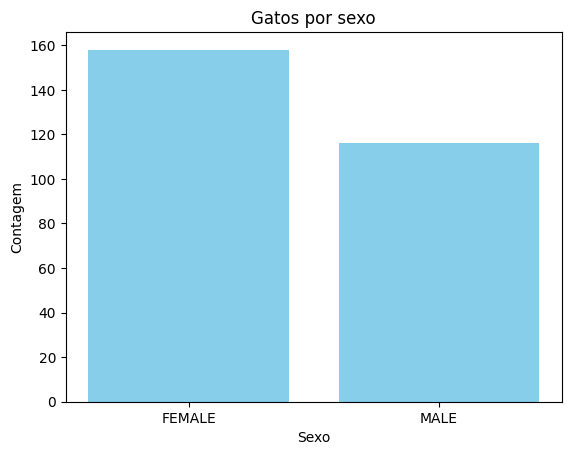

In [ ]:
#Plotando gráfico de machos e fêmeas
total = df['SEXO'].value_counts()
femeas = len(df.loc[df['SEXO']=='FEMALE'])
machos = len(df.loc[df['SEXO']=='MALE'])
print(f'Femeas: {femeas}')
plt.figure()
plt.bar(height = total.values, x = total.index, color ='skyblue')
plt.title('Gatos por sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

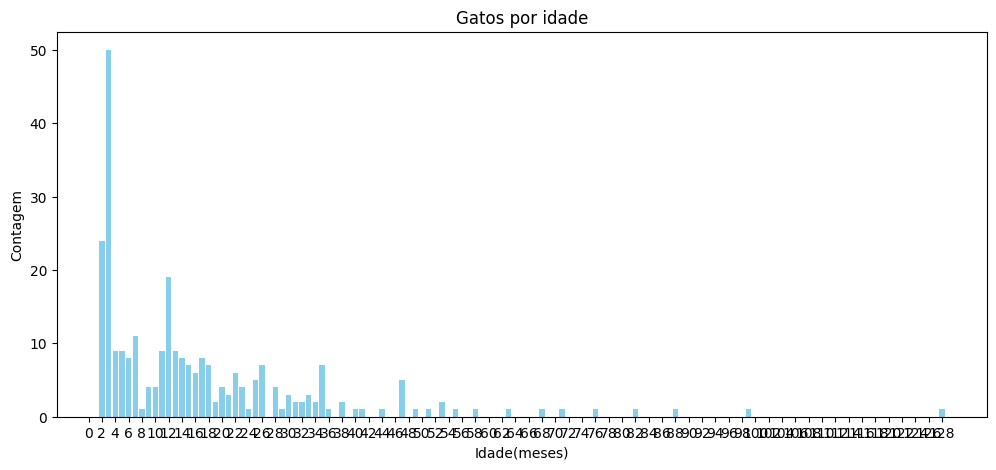

In [ ]:
#Plotando gráfico de idades
gatos_idade = df['IDADE (MESES)'].value_counts()
plt.figure(figsize=(12, 5))
plt.bar(height=gatos_idade.values, x =gatos_idade.index, color='skyblue')
plt.title('Gatos por idade')
plt.xlabel('Idade(meses)')
plt.xticks(ticks=range(0, max(gatos_idade.index) + 1, 2))
plt.ylabel('Contagem')
plt.show()

# Fechando o arquivo CSV

In [ ]:
#Obter a data atual para incluir no dataframe
data_atual = datetime.now().strftime("%Y-%m-%d")

In [ ]:
#Preenchendo a coluna com a data de entrada
df['ENTRADA'] = data_atual
df['ENTRADA'] = pd.to_datetime(df['ENTRADA'], format='%Y-%m-%d')

In [ ]:
#Salvando arquivo .csv
df.to_csv(f'/content/drive/MyDrive/Petz/csv/project_petz_14.csv', index =False, sep =';')

### Análise comparativa

Perguntas a serem respondidas:
quantos gatos foram adotados entre essas 4 semanas?
qual a ong com mais adoções?
qual a média de idade dos gatos?
qual a média de idade em que há mais adoções? gatos mais jovens são mais adotados?
realmente há mais gatas fêmeas disponíveis?
existe alguma região/unidade com mais adoção?



